data.target_names ['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']
From: dfo@vttoulu.tko.vtt.fi (Foxvog Douglas)
Subject: Re: Rewording the Second Amendment (ideas)
Organization: VTT
Lines: 58

In article <1r1eu1$4t@transfer.stratus.com> cdt@sw.stratus.com (C. D. Tavares) writes:
>In article <1993Apr20.083057.16899@ousrvr.oulu.fi>, dfo@vttoulu.tko.vtt.fi (Foxvog Douglas) writes:
>> In article <1qv87v$4j3@transfer.stratus.com> cdt@sw.stratus.com (C. D. Tavares) writes:
>> >In article <C5n3GI.F8F@ulowell.ulowell.edu>, jrutledg@cs.ulowell.edu (John Lawrence Rutledge) writes:
>
>> >> The massive destructive power of many modern weapons, makes the
>> >

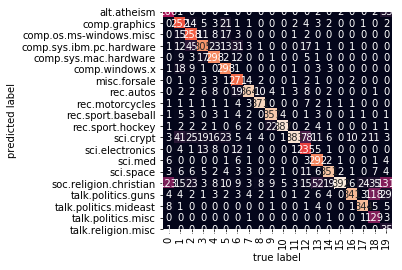

soc.religion.christian
talk.politics.mideast
sci.space
rec.autos


In [3]:

"""========================================================================================================
                Naive Bayes
===========================================================================================================
"""
#%%
# Importing the libraries
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

#%%
# importing the dataset
data = fetch_20newsgroups()

# %%
print("data.target_names",data.target_names)

# %%
# training the data on these categories
categories = data.target_names

train = fetch_20newsgroups(subset='train', categories=categories)

test = fetch_20newsgroups(subset='test', categories=categories)

print(train.data[5])


#%%
model = make_pipeline(TfidfVectorizer(), MultinomialNB())
# print("TfidfVectorizer",TfidfVectorizer())

#%%
model.fit(train.data, train.target)

# %%
labels = model.predict(test.data)



# %%
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')
# plt.tight_layout()
plt.savefig('heat_map.jpg', dpi=1000, bbox_inches="tight")
plt.show()

# %%
# predicting
def predict_category(s, train=train, model=model):
    pred = model.predict([s])
    return train.target_names[pred[0]]

#%%
print(predict_category('Jesus christ'))
print(predict_category('Prime minister of Nepal'))
print(predict_category('Everest'))

# %%
print(predict_category('Ford is better than Toyota'))